# Task2 - Crack Segmentation

#### In this task you propose an approach to semantically segment the cracks in the image. Semantic segmentation is the task where every pixel in the input image is assigned a class label in the output. Crack segmentation is a binary task with the classes no-crack and crack. use value 0 for no-crack and 255 for crack.

#### a) Cracks typically appear as dark line-like structures on brighter background. Thus, thresholding can be an intuitive first processing step for crack segmentation. Design and implement a thresholding method suitable for segmenting the cracks. Try to incorporate adaptiveness towards images of different brightness levels. The thresholding procedure usually yields many false positives, i.e. regions which do not represent cracks but are classified as crack.

In [171]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

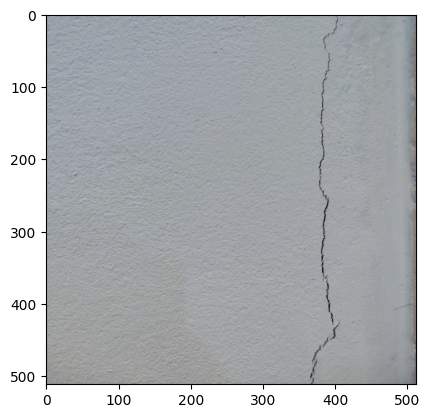

(512, 512, 3)

In [172]:
#read image and show
img = cv2.imread("split_dataset/train/no-crack/Grill Imbiss Theaterplatz.png")
plt.imshow(img)
plt.show()
img.shape

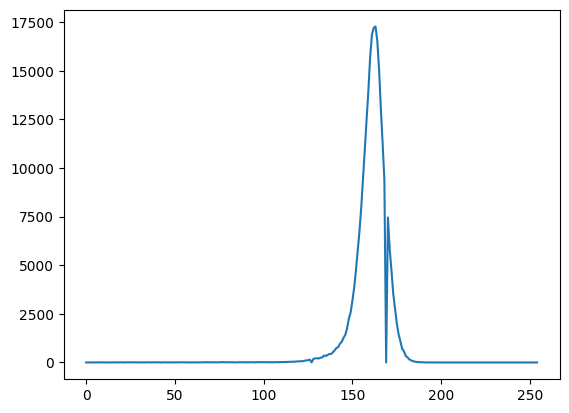

In [173]:
histogram = cv2.calcHist([img],[0],None,[255],[0,249])
plt.plot(histogram)
plt.show()

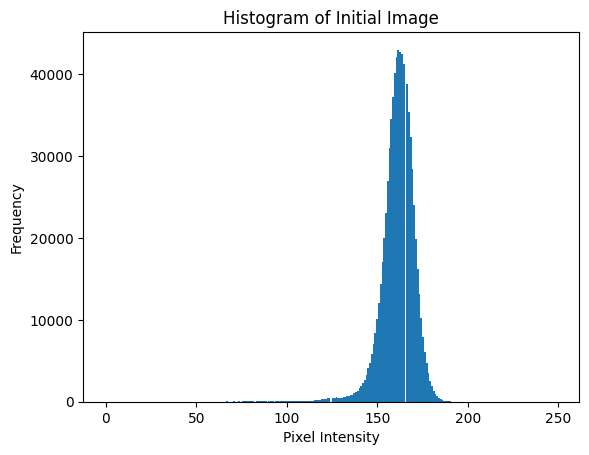

In [174]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.hist(img.ravel(), bins=255, range=(0, 249))
plt.title('Histogram of Initial Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# plt.savefig("After Streched Image")

Enhance the image using contrast stretching (self-written code; built-in min, max are allowed)

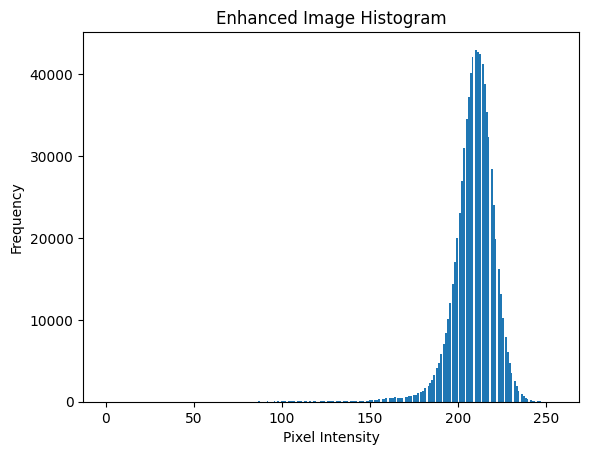

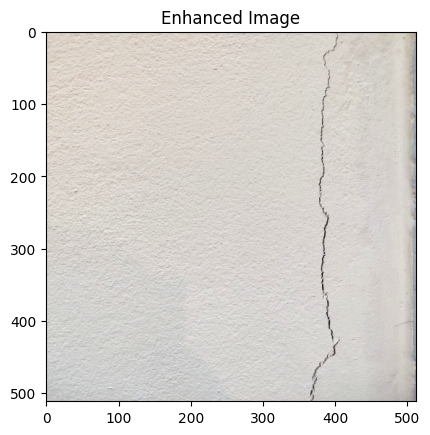

In [175]:
# Calculate minimum and maximum pixel values
min_val=np.min(img)
max_val=np.max(img)

#vectorized operations
contrast_stretching= np.zeros_like(img)
# Perform contrast stretching
contrast_stretching = 255*((img - min_val)/ (max_val - min_val))


# Round the pixel values to the nearest integer
contrast_stretching = np.round(contrast_stretching)

#pixel values to the range [0, 255]
contrast_stretching = np.clip(contrast_stretching, 0, 255)
contrast_stretching = contrast_stretching.astype('uint8')

plt.figure()
plt.hist(contrast_stretching.ravel(), bins=255, range=(0, 256))
plt.title('Enhanced Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
plt.figure()
plt.imshow(contrast_stretching, cmap='gray')
plt.title("Enhanced Image")
plt.show()

Visualizes the enhanced image

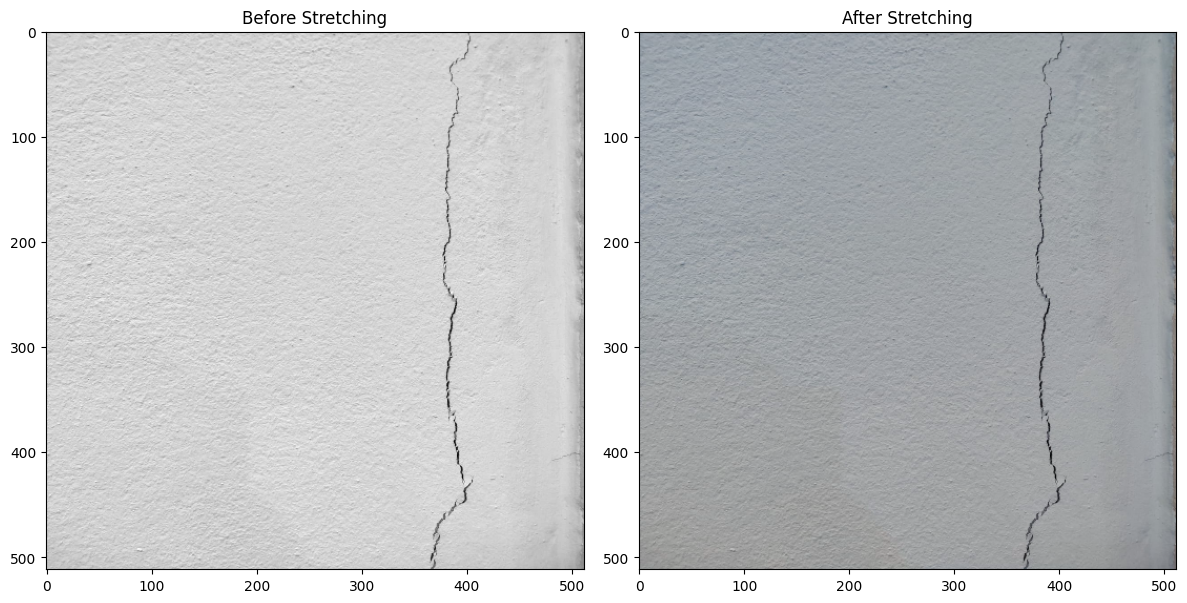

In [176]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to obtain a binary image
binary_image = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# Load the contrast-stretched image 
contrast_stretching = cv2.imread("split_dataset/train/no-crack/Grill Imbiss Theaterplatz.png")

# Plot the images side by side
plt.figure(figsize=(12, 6))

# Before Stretching
plt.subplot(1, 2, 1)
plt.title("Before Stretching")
plt.imshow(gray_image, cmap="gray")
plt.axis("on")

# After Stretching
plt.subplot(1, 2, 2)
plt.title("After Stretching")
plt.imshow(contrast_stretching, cmap="gray")
plt.axis("on")

cv2.imwrite("After Streched Image.png", contrast_stretching)
plt.tight_layout()
plt.show()

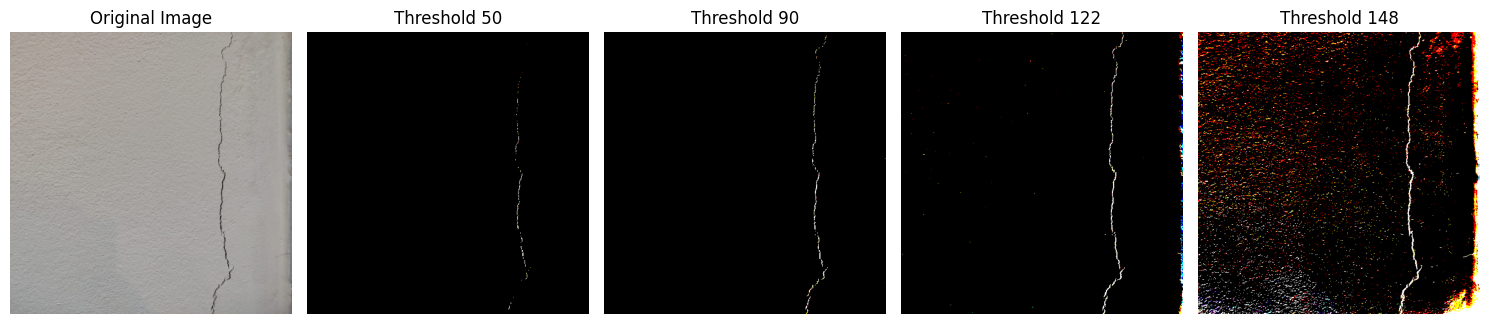

In [177]:
# Define a list of threshold values to try
threshold_values = [50, 90, 122, 148]

# Calculate the number of rows and columns for subplots
num_rows = 1
num_columns = len(threshold_values) + 1  # Add one for the original image

# Create a figure and axis objects
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5))

# Display the original image
axes[0].imshow(cv2.cvtColor(contrast_stretching, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

# Loop through the threshold values and apply thresholding
for i, threshold_value in enumerate(threshold_values):
    threshold_type = cv2.THRESH_BINARY_INV
    binary_image = cv2.threshold(contrast_stretching, threshold_value, 255, threshold_type)[1]

    # Display the binary image
    axes[i + 1].imshow(binary_image, cmap="gray")
    axes[i + 1].set_title(f"Threshold {threshold_value}")
    axes[i + 1].axis("off")

plt.tight_layout()
plt.show()

##### among all the valuse I found the threshold value 90 was good

In [178]:
# Apply adaptive thresholding to obtain binary image
threshold_value = 90
max_value = 255
threshold_type = cv2.THRESH_BINARY_INV
binary_image = cv2.threshold(contrast_stretching, threshold_value, max_value, threshold_type)[1]


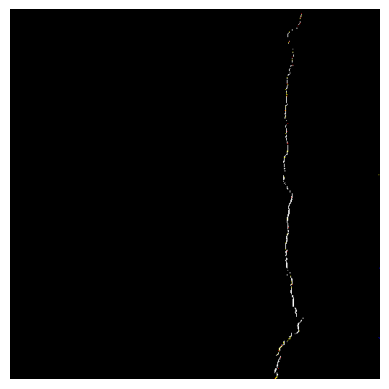

True

In [179]:
# Show binary image
plt.imshow(binary_image)
# plt.title('Threshold values- 90,255')
plt.axis("off")
plt.show()

cv2.imwrite("After Thresholding.png", binary_image)

#### b) Play around with morphological operators in order to clean up the result (e.g. by removing isolated points and ensuring a better connectedness of the cracks). You are allowed to use built-in functions.

In [180]:
threshold_img= cv2.imread("Task2 Images/After Thresholding.png", cv2.IMREAD_GRAYSCALE)

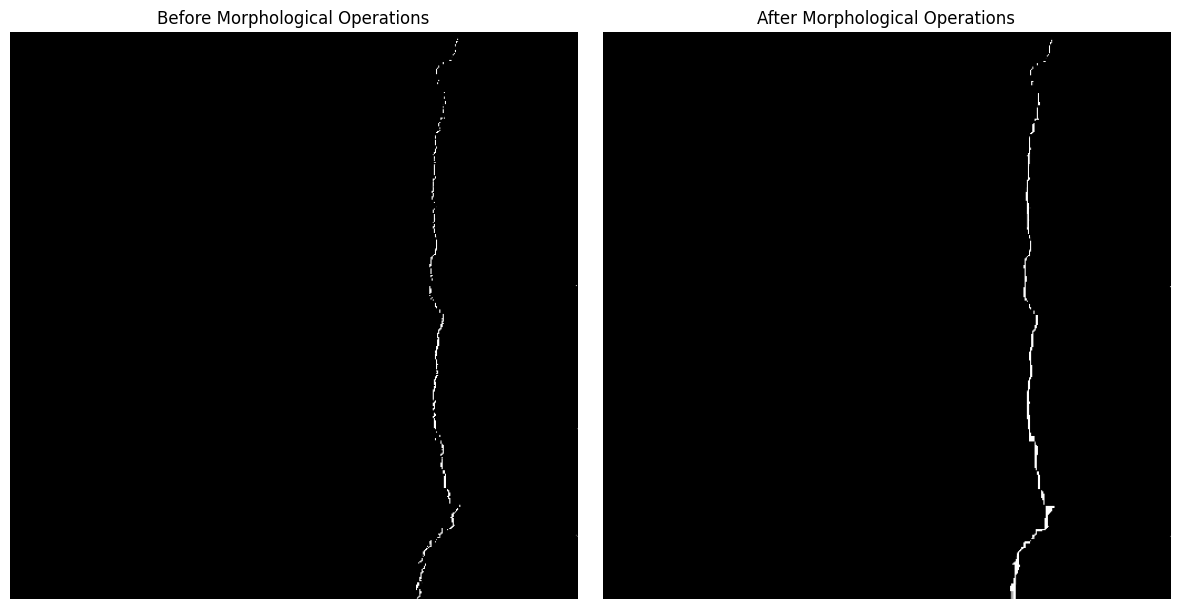

In [181]:
# Define a kernel for morphological operations
kernel = np.ones((10, 10), np.uint8)  # You can adjust the kernel size as needed

# 1. Dilation to connect nearby cracks and make them thicker
dilated_image = cv2.dilate(threshold_img, kernel, iterations=1)

# 2. Erosion to remove noise and thin out the cracks slightly
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# plot the images
plt.figure(figsize=(12, 6))

# Before Morphological Operations
plt.subplot(1, 2, 1)
plt.title("Before Morphological Operations")
plt.imshow(threshold_img, cmap="gray")
plt.axis("off")

# After Morphological Operations
plt.subplot(1, 2, 2)
plt.title("After Morphological Operations")
plt.imshow(eroded_image, cmap="gray")
plt.axis("off")

plt.imsave("After Morphological Operations.png", eroded_image)
plt.tight_layout()

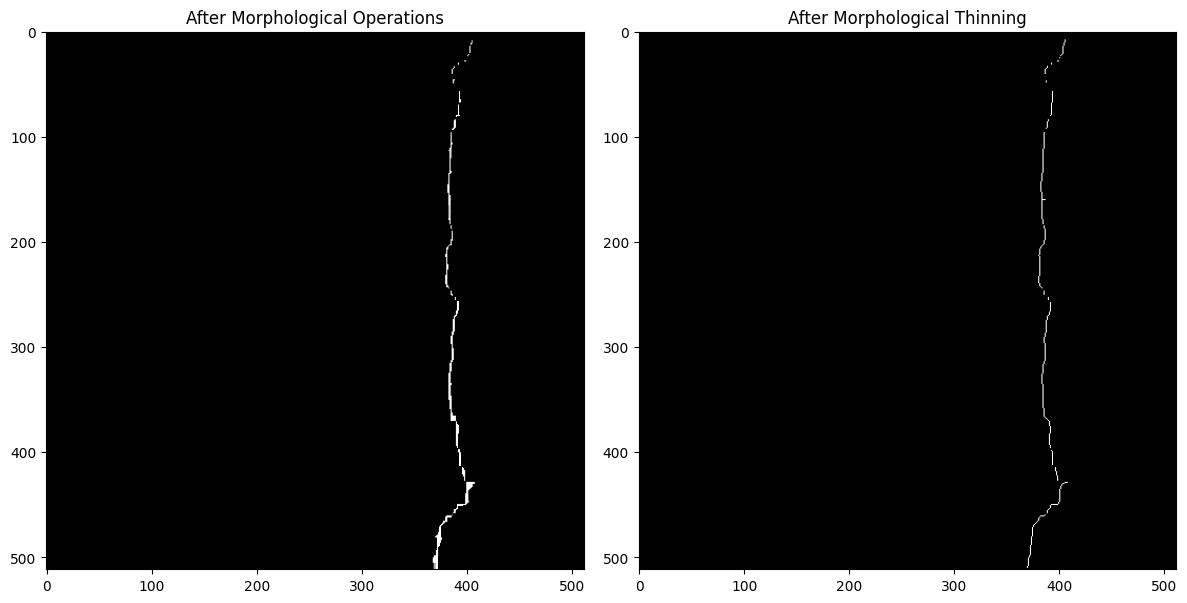

In [182]:
from skimage.morphology import skeletonize
# 3. Closing to further connect cracks
closing_image = cv2.morphologyEx(eroded_image, cv2.MORPH_CLOSE, kernel)

# 4. Morphological thinning using scikit-image
thinned_image = skeletonize(closing_image)

# plaot the images
plt.figure(figsize=(12, 6))

# After Morphological Operations
plt.subplot(1, 2, 1)
plt.title("After Morphological Operations")
plt.imshow(closing_image, cmap="gray")

# After Morphological Thinning
plt.subplot(1, 2, 2)
plt.title("After Morphological Thinning")
plt.imshow(thinned_image, cmap="gray")

plt.tight_layout()
plt.show()


#### c) From the resulting segmentation mask extract discrete regions by implementing connected component analysis as presented in the lecture.

![Alt text](image-1.png)

In [183]:
# Load the segmented image (your cleaned-up crack image)
segmented_image = cv2.imread("After Morphological Operations.png", cv2.IMREAD_GRAYSCALE)

# Define an equivalent label table
equivalent_labels = {}

# Initialize the label counter
label_counter = 0

# Create a function to find the root label of an equivalence group
def find_root_label(label):
    if label in equivalent_labels:
        return find_root_label(equivalent_labels[label])
    else:
        return label

# Process the image row by row and label connected components
for y in range(segmented_image.shape[0]):
    for x in range(segmented_image.shape[1]):
        # Check if the current pixel is foreground (crack)
        if segmented_image[y, x] == 255:
            # Get the labels of the neighboring pixels
            neighbors = []

            if x > 0 and segmented_image[y, x - 1] == 255:
                neighbors.append(segmented_image[y, x - 1])

            if y > 0 and segmented_image[y - 1, x] == 255:
                neighbors.append(segmented_image[y - 1, x])

            # If there are no neighboring foreground pixels, assign a new label
            if not neighbors:
                label_counter += 1
                segmented_image[y, x] = label_counter
            else:
                # Assign the smallest label among neighbors
                min_neighbor_label = min(neighbors)
                segmented_image[y, x] = min_neighbor_label

                # Update the equivalent label table
                for neighbor in neighbors:
                    if neighbor != min_neighbor_label:
                        root_label = find_root_label(neighbor)
                        equivalent_labels[root_label] = min_neighbor_label

# Perform a second pass to update labels with equivalent labels
for y in range(segmented_image.shape[0]):
    for x in range(segmented_image.shape[1]):
        label = segmented_image[y, x]
        if label in equivalent_labels:
            segmented_image[y, x] = find_root_label(label)
            

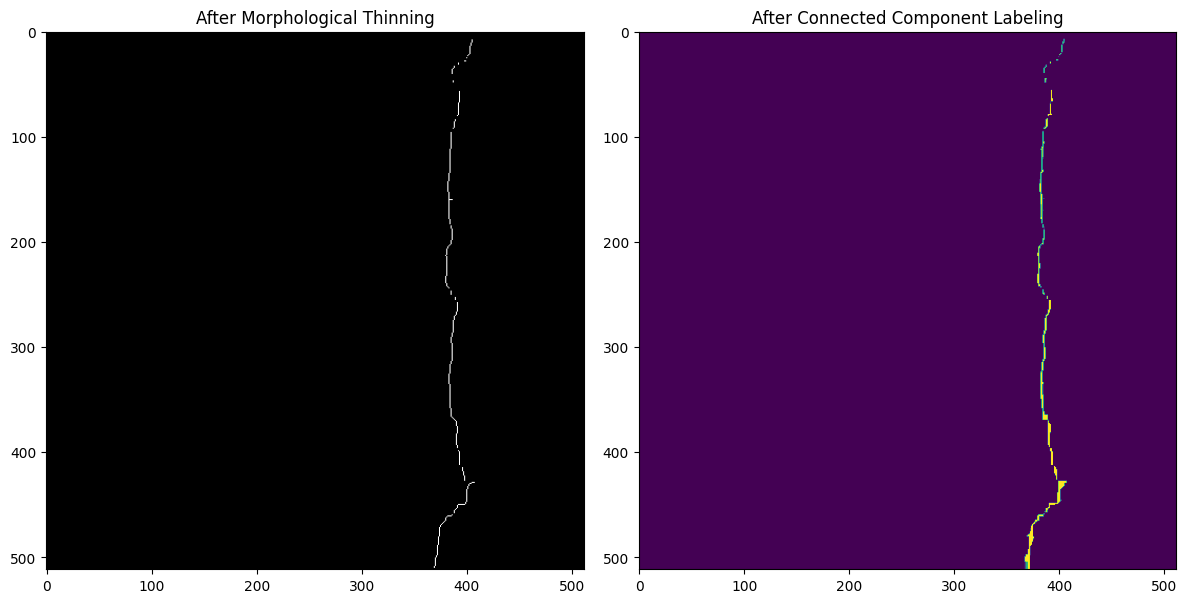

In [184]:
# plot the images
plt.figure(figsize=(12, 6))

# After Morphological Thinning
plt.subplot(1, 2, 1)
plt.title("After Morphological Thinning")
plt.imshow(thinned_image, cmap="gray")

# After Connected Component Labeling
plt.subplot(1, 2, 2)
plt.title("After Connected Component Labeling")
plt.imshow(segmented_image)

plt.savefig("After Connected Component Labeling.png")

plt.tight_layout()
plt.show()

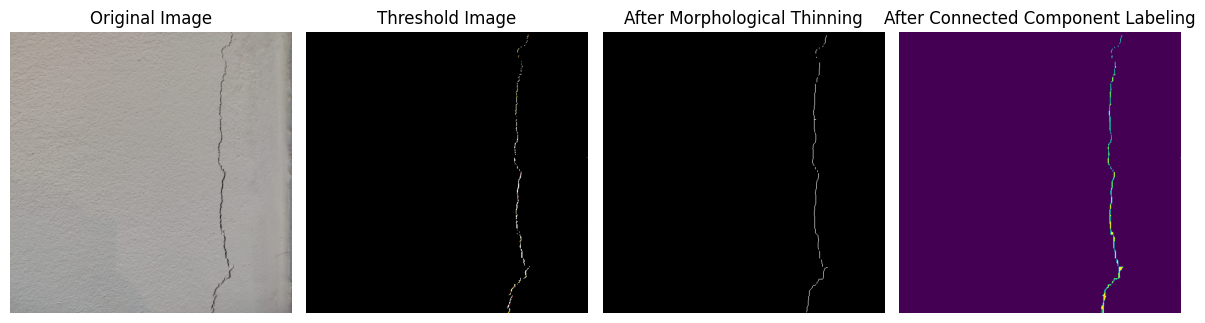

In [185]:
#plot all for original image, threshold image. after hinnking and connected component labeling
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(contrast_stretching, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Threshold Image
plt.subplot(1, 4, 2)
plt.title("Threshold Image")
plt.imshow(binary_image, cmap="gray")
plt.axis("off")

# After Morphological Thinning
plt.subplot(1, 4, 3)
plt.title("After Morphological Thinning")
plt.imshow(thinned_image, cmap="gray")
plt.axis("off")

# After Connected Component Labeling
plt.subplot(1, 4, 4)
plt.title("After Connected Component Labeling")
plt.imshow(segmented_image)
plt.axis("off")


plt.tight_layout()
plt.show()

#### d) Feature engineering: Create a feature vector for each instance of potentially useful features (region properties, circularity, color, ...) – be creative. Based on the annotated ground truth, assign a label to each region whether it represents a crack or no-crack. These feature vectors alongside the true labels will serve as input to the next step.

In [186]:
from skimage.measure import regionprops

In [187]:
# Load the labeled image (result from connected component analysis)
labeled_image = cv2.imread("After Morphological Operations.png", cv2.IMREAD_GRAYSCALE)

# Load the ground truth image (assuming white pixels represent cracks)
ground_truth = cv2.imread("split_dataset/train/crack/Grill Imbiss Theaterplatz_annotation.png", cv2.IMREAD_GRAYSCALE)

# Initialize lists to store feature vectors and labels
feature_vectors = []
labels = []

# Iterate through each labeled region
for region in regionprops(labeled_image):
    # Extract region properties
    area = region.area
    perimeter = region.perimeter
    
    # Check if major_axis_length is zero before calculating the aspect ratio
    if region.major_axis_length != 0:
        aspect_ratio = region.minor_axis_length / region.major_axis_length
    else:
        aspect_ratio = 0.0  # Handle division by zero case
    
    # Calculate circularity (check for zero perimeter to avoid division by zero)
    if perimeter != 0:
        circularity = 4 * np.pi * (area / (perimeter**2))
    else:
        circularity = 0.0  # Handle division by zero case
    
    # Extract centroid coordinates
    centroid_x, centroid_y = region.centroid
    
    # Calculate distance from the center of the image
    image_center_x, image_center_y = labeled_image.shape[1] / 2, labeled_image.shape[0] / 2
    distance_to_center = np.sqrt((centroid_x - image_center_x)**2 + (centroid_y - image_center_y)**2)
    
    # Determine if the region is a crack based on ground truth
    x, y = int(centroid_x), int(centroid_y)
    is_crack = ground_truth[y, x] == 255
    
    # Create a feature vector
    feature_vector = [area, perimeter, aspect_ratio, circularity, centroid_x, centroid_y, distance_to_center]
    
    # Append the feature vector and label to lists
    feature_vectors.append(feature_vector)
    labels.append(is_crack)

In [195]:
# results
print("Feature vector for the first region:")
print(feature_vectors[0])
print("Label for the first region:")
print(labels[0])

# Print crack region features
print("Crack region features:")
print("Area\t\tPerimeter\tAspect Ratio\tCircularity")
print("-------------------------------------------------------------------------------------")
for i, feature_vector in enumerate(feature_vectors):
    if labels[i]:
        print("\t".join([f"{feature:.2f}" for feature in feature_vector]))
        
# Print non-crack region features
print("\nNon-crack region features:")
print("Area\t\tPerimeter\tAspect Ratio\tCircularity")
print("-------------------------------------------------------------------------------------")
for i, feature_vector in enumerate(feature_vectors):
    if not labels[i]:
        print("\t".join([f"{feature:.2f}" for feature in feature_vector]))
        

Feature vector for the first region:
[261153.0, 3141.9076836320746, 0.998587982033484, 0.3324436504618354, 255.27571959732418, 255.00851225143882, 1.2278558780439863]
Label for the first region:
False
Crack region features:
Area		Perimeter	Aspect Ratio	Circularity
-------------------------------------------------------------------------------------

Non-crack region features:
Area		Perimeter	Aspect Ratio	Circularity
-------------------------------------------------------------------------------------
261153.00	3141.91	1.00	0.33	255.28	255.01	1.23
54.00	25.00	0.03	1.09	304.39	380.70	133.76
1.00	0.00	0.00	0.00	455.00	511.00	323.46
58.00	31.00	0.10	0.76	293.21	382.66	132.01
878.00	744.25	0.06	0.02	316.49	385.30	142.75


In [204]:
# Print crack region features
print("Crack region features:")
print("Area\t\tPerimeter\tAspect Ratio\tCircularity")
print("-------------------------------------------------------------------------------------")
for i, feature_vector in enumerate(feature_vectors):
    if labels[i]:
        print("\t".join([f"{feature:.2f}" for feature in feature_vector]))

# Print non-crack region features
print("\nNon-crack region features:")
print("Area\t\tPerimeter\tAspect Ratio\tCircularity")
print("-------------------------------------------------------------------------------------")
for i, feature_vector in enumerate(feature_vectors):
    if not labels[i]:
        print("\t".join([f"{feature:.2f}" for feature in feature_vector]))


Crack region features:
Area		Perimeter	Aspect Ratio	Circularity
-------------------------------------------------------------------------------------

Non-crack region features:
Area		Perimeter	Aspect Ratio	Circularity
-------------------------------------------------------------------------------------
261153.00	3141.91	1.00	0.33	255.28	255.01	1.23
54.00	25.00	0.03	1.09	304.39	380.70	133.76
1.00	0.00	0.00	0.00	455.00	511.00	323.46
58.00	31.00	0.10	0.76	293.21	382.66	132.01
878.00	744.25	0.06	0.02	316.49	385.30	142.75


In [ ]:
# Now do all these steps for my training dataset grayscale conversion, morphological operations, connected component labeling and feature extraction
# Load the dataset
import os
import cv2
import numpy as np
from skimage.measure import regionprops

#### e) Classifier: Implement a classifier that uses the prepared features in order to filter out non-crack regions. You are allowed to implement a heuristic rule-based approach. Furthermore, you are welcome to experiment with support vector machines (SVM), decision trees, or any other concept taught in the course, which you consider suitable. Explain your reasons and ideas for choosing your approach.

In [200]:
# thresholds for feature values
area_threshold = 1000  
aspect_ratio_threshold = 0.6  
circularity_threshold = 0.6  

In [201]:
classified_regions = []

for i, region_feature_vector in enumerate(feature_vectors):
    area, _, aspect_ratio, circularity, _, _, _ = region_feature_vector
    if (
        area >= area_threshold and
        aspect_ratio >= aspect_ratio_threshold and
        circularity >= circularity_threshold
    ):
        classified_regions.append((i, 'Crack'))
    else:
        classified_regions.append((i, 'Non-Crack'))

## My classifier

In [202]:
def classify_regions(feature_vectors, area_threshold=1000, aspect_ratio_threshold=0.6, circularity_threshold=0.6):
    # Initialize a list to store the classified regions
    classified_regions = []

    # Iterate through each region and apply the classifier
    for i, region_feature_vector in enumerate(feature_vectors):
        area, _, aspect_ratio, circularity, _, _, _ = region_feature_vector
        
        # Check if the region meets the criteria to be considered a crack
        if (
            area >= area_threshold and
            aspect_ratio >= aspect_ratio_threshold and
            circularity >= circularity_threshold
        ):
            # onsider it a crack
            classified_regions.append((i, 'Crack'))
        else:
            # consider it a non-crack
            classified_regions.append((i, 'Non-Crack'))
    
    return classified_regions


In [203]:
# check the accuracy of the classifier


import os
import cv2
import numpy as np
from skimage.measure import regionprops

# Define a function to calculate the accuracy of the classifier

def calculate_accuracy(classified_regions, ground_truth):
    # Initialize a counter to store the number of correct classifications
    correct_classifications = 0

    # Iterate through each classified region
    for i, classified_region in enumerate(classified_regions):
        # Extract the region label
        region_label = classified_region[1]
        
        # Extract the ground truth label
        ground_truth_label = 'Crack' if ground_truth[i] == 255 else 'Non-Crack'
        
        # Check if the classified region label matches the ground truth label
        if region_label == ground_truth_label:
            correct_classifications += 1
    
    # Calculate the accuracy as a percentage
    accuracy = (correct_classifications / len(classified_regions)) * 100
    
    # Return the accuracy
    return accuracy

# Load the labeled image (result from connected component analysis)
labeled_image = cv2.imread("After Morphological Operations.png", cv2.IMREAD_GRAYSCALE)

# Load the ground truth image (assuming white pixels represent cracks)
ground_truth = cv2.imread("split_dataset/train/crack/Grill Imbiss Theaterplatz_annotation.png", cv2.IMREAD_GRAYSCALE)

# Classify the regions
classified_regions = classify_regions(feature_vectors)

# Calculate the accuracy
accuracy = calculate_accuracy(classified_regions, ground_truth)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}%")



TypeError: 'NoneType' object is not subscriptable